In [6]:
import os
os.getcwd()

'C:\\Users\\HP'

In [7]:
os.chdir("C:/Users/HP/Desktop/Data Sets")
os.getcwd()

'C:\\Users\\HP\\Desktop\\Data Sets'

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
df1=pd.read_csv("Loan-data.csv")

In [9]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
pd.crosstab(df1['job'],df1['education'],margins=True)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,All
job,,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249,10422
blue-collar,2318,1426,3623,878,8,453,94,454,9254
entrepreneur,137,71,210,234,2,135,610,57,1456
housemaid,474,77,94,174,1,59,139,42,1060
management,100,85,166,298,0,89,2063,123,2924
retired,597,75,145,276,3,241,285,98,1720
self-employed,93,25,220,118,3,168,765,29,1421
services,132,226,388,2682,0,218,173,150,3969
student,26,13,99,357,0,43,170,167,875


In [11]:
df1.loc[(df1['age']>60) & (df1['job']=='unknown'), 'job'] = 'retired'
df1.loc[(df1['education']=='unknown') & (df1['job']=='management'), 'education'] = 'university.degree'
df1.loc[(df1['education']=='unknown') & (df1['job']=='services'), 'education'] = 'high.school'
df1.loc[(df1['education']=='unknown') & (df1['job']=='housemaid'), 'education'] = 'basic.4y'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='basic.4y'), 'job'] = 'blue-collar'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='basic.6y'), 'job'] = 'blue-collar'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='basic.9y'), 'job'] = 'blue-collar'
df1.loc[(df1['job'] =='unknown') & (df1['education']=='professional.course'), 'job'] = 'technician'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='high.school'), 'job'] = 'admin.'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='university.degree'), 'job'] = 'management'
df1.loc[(df1['education']=='unknown') & (df1['job']=='admin.'), 'education'] = 'university.degree'
df1.loc[(df1['education']=='unknown') & (df1['job']=='blue-collar'), 'education'] = 'basic.9y'
df1.loc[(df1['education']=='unknown') & (df1['job']=='entrepreneur'), 'education'] = 'university.degree'
df1.loc[(df1['education']=='unknown') & (df1['job']=='retired'), 'education'] = 'basic.4y'
df1.loc[(df1['education']=='unknown') & (df1['job']=='self-employed'), 'education'] = 'university.degree'
df1.loc[(df1['education']== 'unknown') & (df1['job']=='student'), 'education'] = 'high.school'
df1.loc[(df1['education']== 'unknown') & (df1['job']=='technician'), 'education'] = 'professional.course'
df1.loc[(df1['education']== 'unknown') & (df1['job']=='unemployed'), 'education'] = 'university.degree'
df1['job'].replace(['unknown'],['admin.'],inplace=True)
df1['education'].replace(['unknown'],['university.degree'],inplace=True)

In [12]:
pd.crosstab(df1['job'],df1['education'],margins=True)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,All
job,,,,,,,,
admin.,77,151,499,3366,1,363,6119,10576
blue-collar,2366,1448,4108,878,8,453,94,9355
entrepreneur,137,71,210,234,2,135,667,1456
housemaid,516,77,94,174,1,59,139,1060
management,100,85,166,298,0,89,2230,2968
retired,713,75,145,276,3,243,286,1741
self-employed,93,25,220,118,3,168,794,1421
services,132,226,388,2832,0,218,173,3969
student,26,13,99,524,0,43,170,875


In [13]:
pd.crosstab(df1['marital'],df1['housing'],margins=True)

housing,no,unknown,yes,All
marital,,,,
divorced,2092,121,2399,4612
married,11389,588,12951,24928
single,5097,280,6191,11568
unknown,44,1,35,80
All,18622,990,21576,41188


In [14]:
pd.crosstab(df1['job'],df1['housing'],margins=True)

housing,no,unknown,yes,All
job,,,,
admin.,4703,229,5644,10576
blue-collar,4362,241,4752,9355
entrepreneur,641,36,779,1456
housemaid,491,29,540,1060
management,1381,73,1514,2968
retired,789,44,908,1741
self-employed,641,40,740,1421
services,1818,101,2050,3969
student,381,23,471,875


In [15]:
df1['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [16]:
df1.loc[(df1['marital']=='unknown') & (df1['education']=='student'), 'marital'] = 'single'
df1.loc[(df1['marital']=='unknown'), 'marital'] = 'married'

In [17]:
df1['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [18]:
pd.crosstab(df1['marital'],df1['housing'],margins=True)

housing,no,unknown,yes,All
marital,,,,
divorced,2092,121,2399,4612
married,11433,589,12986,25008
single,5097,280,6191,11568
All,18622,990,21576,41188


In [19]:
pd.crosstab(df1['job'],df1['housing'],margins=True)

housing,no,unknown,yes,All
job,,,,
admin.,4703,229,5644,10576
blue-collar,4362,241,4752,9355
entrepreneur,641,36,779,1456
housemaid,491,29,540,1060
management,1381,73,1514,2968
retired,789,44,908,1741
self-employed,641,40,740,1421
services,1818,101,2050,3969
student,381,23,471,875


In [20]:
pd.crosstab(df1['job'],df1['marital'],margins=True)

marital,divorced,married,single,All
job,,,,
admin.,1285,5392,3899,10576
blue-collar,731,6775,1849,9355
entrepreneur,179,1074,203,1456
housemaid,161,780,119,1060
management,332,2115,521,2968
retired,352,1293,96,1741
self-employed,133,909,379,1421
services,532,2300,1137,3969
student,9,42,824,875


In [21]:
df1.loc[(df1['marital']=='married') & (df1['job']=='admin.') & (df1['housing']=='unknown'), 'housing'] = 'yes'
df1.loc[(df1['marital']!='married') & (df1['job']!='admin.') & (df1['housing']=='unknown'), 'housing'] = 'no'
df1.loc[(df1['marital']!='married') & (df1['job']=='admin.') & (df1['housing']=='unknown'), 'housing'] = 'no'
df1.loc[(df1['marital']=='married') & (df1['job']!='admin.') & (df1['housing']=='unknown'), 'housing'] = 'yes'

In [22]:
pd.crosstab(df1['marital'],df1['housing'],margins=True)

housing,no,yes,All
marital,,,
divorced,2213,2399,4612
married,11433,13575,25008
single,5377,6191,11568
All,19023,22165,41188


In [23]:
pd.crosstab(df1['job'],df1['housing'],margins=True)

housing,no,yes,All
job,,,
admin.,4817,5759,10576
blue-collar,4439,4916,9355
entrepreneur,647,809,1456
housemaid,499,561,1060
management,1406,1562,2968
retired,797,944,1741
self-employed,655,766,1421
services,1862,2107,3969
student,404,471,875


In [24]:
pd.crosstab(df1['marital'],df1['loan'],margins=True)

loan,no,unknown,yes,All
marital,,,,
divorced,3816,121,675,4612
married,20634,589,3785,25008
single,9500,280,1788,11568
All,33950,990,6248,41188


In [25]:
pd.crosstab(df1['job'],df1['loan'],margins=True)

loan,no,unknown,yes,All
job,,,,
admin.,8614,229,1733,10576
blue-collar,7730,241,1384,9355
entrepreneur,1214,36,206,1456
housemaid,877,29,154,1060
management,2447,73,448,2968
retired,1452,44,245,1741
self-employed,1186,40,195,1421
services,3267,101,601,3969
student,710,23,142,875


In [26]:
df1.loc[(df1['marital']=='married') & (df1['job']!='admin') & (df1['loan']=='unknown'), 'loan'] = 'yes'
df1.loc[(df1['marital']!='married') & (df1['job']!='admin') & (df1['loan']=='unknown'), 'loan'] = 'no'


In [27]:
pd.crosstab(df1['marital'],df1['loan'],margins=True)

loan,no,yes,All
marital,,,
divorced,3937,675,4612
married,20634,4374,25008
single,9780,1788,11568
All,34351,6837,41188


In [28]:
pd.crosstab(df1['job'],df1['default'],margins=True)

default,no,unknown,yes,All
job,,,,
admin.,9182,1394,0,10576
blue-collar,6148,3207,0,9355
entrepreneur,1155,301,0,1456
housemaid,741,319,0,1060
management,2508,460,0,2968
retired,1344,397,0,1741
self-employed,1139,282,0,1421
services,3053,916,0,3969
student,771,104,0,875


In [29]:
pd.crosstab(df1['marital'],df1['default'],margins=True)

default,no,unknown,yes,All
marital,,,,
divorced,3781,831,0,4612
married,18724,6281,3,25008
single,10083,1485,0,11568
All,32588,8597,3,41188


In [30]:
pd.crosstab(df1['education'],df1['default'],margins=True)

default,no,unknown,yes,All
education,,,,
basic.4y,2595,1735,0,4330
basic.6y,1441,851,0,2292
basic.9y,4676,1823,0,6499
high.school,8157,1674,1,9832
illiterate,11,7,0,18
professional.course,4604,849,2,5455
university.degree,11104,1658,0,12762
All,32588,8597,3,41188


In [31]:
df1['default'].replace(['unknown'],['no'],inplace=True)

In [32]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
df1['marital'].replace(['married','single','divorced'],[0,1,2],inplace=True)

In [34]:
df1['marital']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        1
9        1
10       0
11       1
12       1
13       2
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       0
22       1
23       1
24       0
25       0
26       0
27       0
28       1
29       0
        ..
41158    2
41159    2
41160    0
41161    0
41162    0
41163    2
41164    0
41165    2
41166    0
41167    0
41168    0
41169    0
41170    2
41171    0
41172    1
41173    0
41174    0
41175    1
41176    2
41177    0
41178    0
41179    2
41180    0
41181    0
41182    1
41183    0
41184    0
41185    0
41186    0
41187    0
Name: marital, Length: 41188, dtype: int64

In [35]:
df1['job'].replace(['admin.','blue-collar','technician','services','management','retired','entrepreneur','self-employed','housemaid','unemployed','student'],[0,1,2,3,4,5,6,7,8,9,10],inplace=True)


In [36]:
df1['job']

0         8
1         3
2         3
3         0
4         3
5         3
6         0
7         1
8         2
9         3
10        1
11        3
12        1
13        8
14        1
15        5
16        1
17        1
18        1
19        4
20        9
21        1
22        5
23        2
24        0
25        2
26        2
27        7
28        2
29        4
         ..
41158     2
41159     2
41160     0
41161     0
41162     1
41163     2
41164     0
41165     8
41166     0
41167     0
41168     6
41169     3
41170     4
41171    10
41172     0
41173     5
41174     5
41175    10
41176     8
41177     5
41178     5
41179     5
41180     0
41181     0
41182     9
41183     5
41184     1
41185     5
41186     2
41187     5
Name: job, Length: 41188, dtype: int64

In [37]:
df1['education'].replace(['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','illiterate'],[0,1,2,3,4,5,6],inplace=True)

In [38]:
df1['education']

0        4
1        1
2        1
3        5
4        1
5        2
6        3
7        2
8        3
9        1
10       2
11       1
12       1
13       4
14       5
15       2
16       5
17       5
18       2
19       2
20       1
21       4
22       1
23       1
24       1
25       0
26       3
27       2
28       0
29       0
        ..
41158    4
41159    4
41160    0
41161    0
41162    4
41163    4
41164    3
41165    0
41166    0
41167    0
41168    0
41169    1
41170    0
41171    3
41172    0
41173    0
41174    0
41175    1
41176    1
41177    3
41178    0
41179    3
41180    0
41181    0
41182    4
41183    3
41184    3
41185    0
41186    3
41187    3
Name: education, Length: 41188, dtype: int64

In [39]:
df1['default'].replace(['no','yes'],[0,1],inplace=True)

In [40]:
df1['housing'].replace(['yes','no'],[0,1],inplace=True)

In [41]:
df1['loan'].replace(['no','yes'],[0,1],inplace=True)

In [42]:
df1['contact'].replace(['cellular','telephone',],[0,1],inplace=True)

In [43]:
df1['month'].replace(['may','jul','aug','jun','nov','apr','oct','sep','mar','dec'],[0,1,2,3,4,5,6,7,8,9],inplace=True)

In [44]:
df1['day_of_week'].replace(['thu','mon','wed','tue','fri'],[0,1,2,3,4],inplace=True)

In [45]:
df1['poutcome'].replace(['nonexistent','failure','success'],[0,1,2],inplace=True)

In [46]:
df1['y'].replace(['no','yes'],[0,1],inplace=True)

In [47]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,8,0,4,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3,0,1,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3,0,1,0,0,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,5,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3,0,1,0,1,1,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
5,45,3,0,2,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,0,3,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,0,2,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
8,24,2,1,3,0,0,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
9,25,3,1,1,0,0,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


# pair plots

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


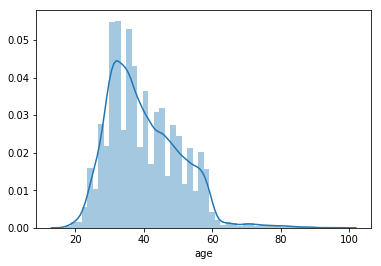

In [48]:
import seaborn as sns
sns.distplot(df1['age'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


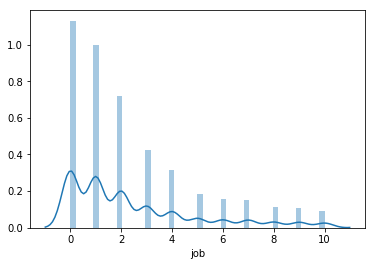

In [49]:
sns.distplot(df1['job'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


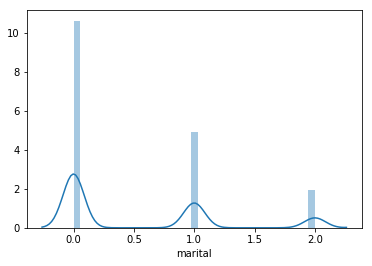

In [50]:
sns.distplot(df1['marital'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


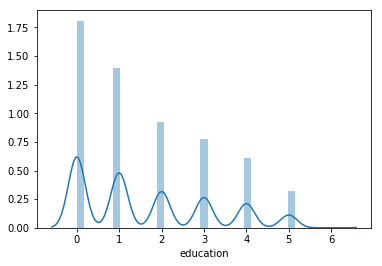

In [51]:
sns.distplot(df1['education'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


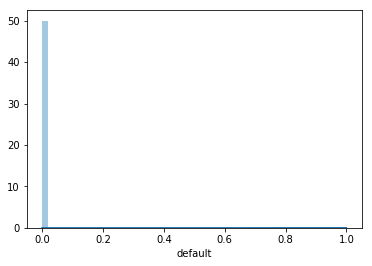

In [52]:
sns.distplot(df1['default'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


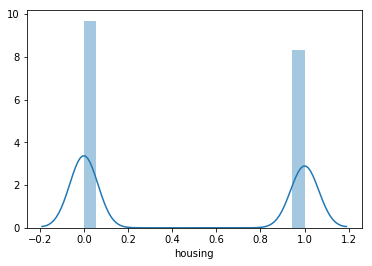

In [53]:
sns.distplot(df1['housing'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


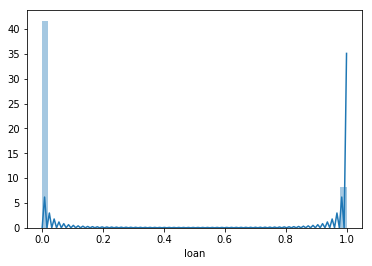

In [57]:
sns.distplot(df1['loan'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


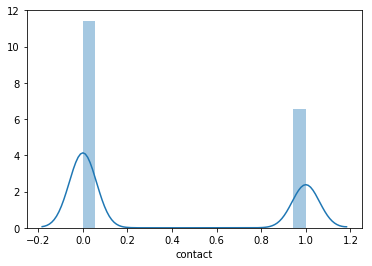

In [58]:
sns.distplot(df1['contact'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


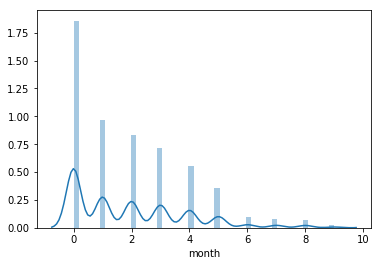

In [59]:
sns.distplot(df1['month'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


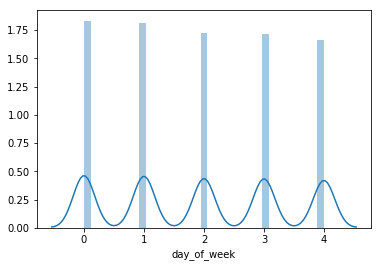

In [60]:
sns.distplot(df1['day_of_week'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


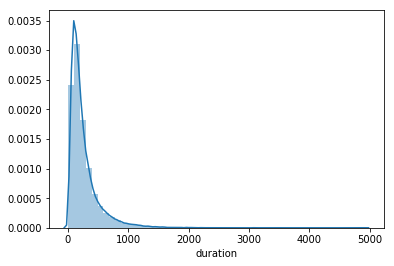

In [61]:
sns.distplot(df1['duration'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


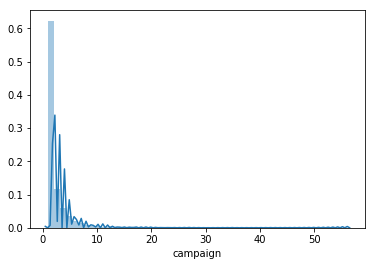

In [62]:
sns.distplot(df1['campaign'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


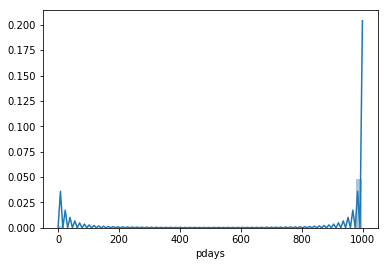

In [63]:
sns.distplot(df1['pdays'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


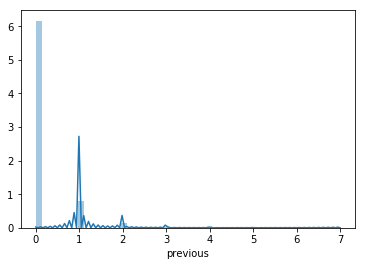

In [64]:
sns.distplot(df1['previous'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


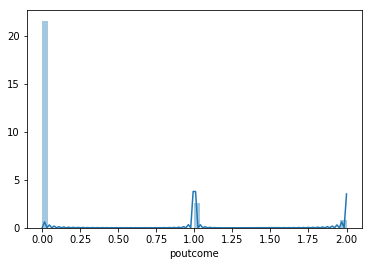

In [65]:
sns.distplot(df1['poutcome'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


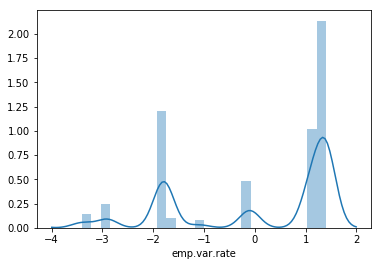

In [66]:
sns.distplot(df1['emp.var.rate'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


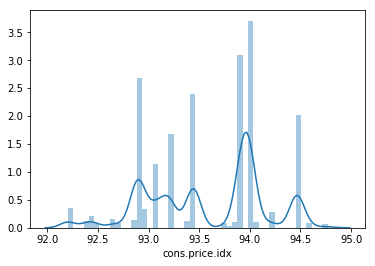

In [67]:
sns.distplot(df1['cons.price.idx'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


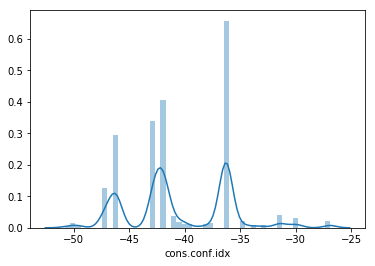

In [68]:
sns.distplot(df1['cons.conf.idx'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


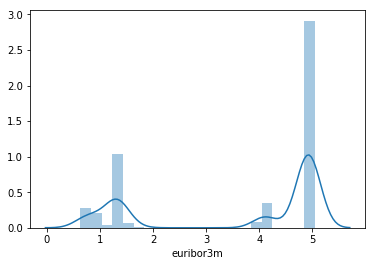

In [69]:
sns.distplot(df1['euribor3m'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


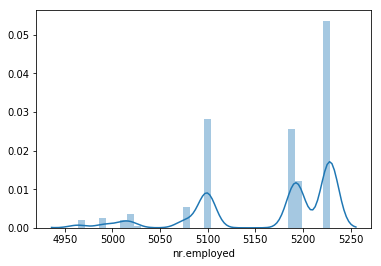

In [70]:
sns.distplot(df1['nr.employed'])

C:\Users\HP\.conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


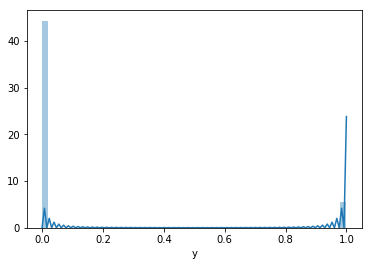

In [74]:
sns.distplot(df1['y'])
plt.savefig('y.png')

In [75]:
df1['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

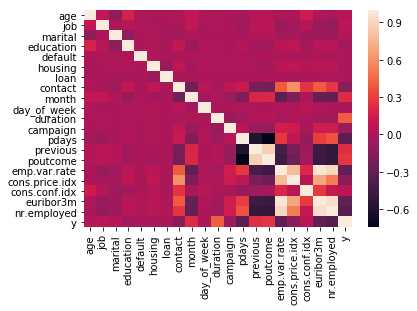

In [76]:
import seaborn as sns
corr=df1.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [77]:
df1.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.093138,-0.116581,0.177227,0.001891,-0.004345,0.000780,0.007021,0.093110,0.016189,...,0.004594,-0.034369,0.024365,0.026371,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.093138,1.000000,-0.000334,0.039653,0.006229,-0.003189,-0.008270,-0.007482,0.091163,-0.007171,...,-0.015393,-0.058682,0.057264,0.055232,-0.082824,-0.031209,0.034408,-0.075015,-0.095077,0.059513
marital,-0.116581,-0.000334,1.000000,-0.118511,-0.006258,0.014152,-0.029703,-0.043604,0.014834,-0.003126,...,0.000403,-0.016699,0.028844,0.028815,-0.047892,-0.023771,-0.051051,-0.053781,-0.049536,0.025622
education,0.177227,0.039653,-0.118511,1.000000,0.003734,0.007244,-0.002788,0.087659,-0.080927,0.007415,...,0.000432,0.032986,-0.036904,-0.036228,0.055169,0.079410,-0.031592,0.046691,0.043384,-0.041816
default,0.001891,0.006229,-0.006258,0.003734,1.000000,0.003506,-0.003808,-0.006474,0.003187,0.006333,...,-0.003803,0.001668,0.002766,0.003061,0.004445,-0.003141,0.004492,0.005274,0.005941,-0.003041
housing,-0.004345,-0.003189,0.014152,0.007244,0.003506,1.000000,-0.078626,0.079074,-0.029670,0.021087,...,0.011334,0.009788,-0.021282,-0.022769,0.057288,0.077598,0.032984,0.056705,0.043613,-0.010785
loan,0.000780,-0.008270,-0.029703,-0.002788,-0.003808,-0.078626,1.000000,-0.005452,-0.010044,0.002107,...,0.004414,0.001190,-0.000995,-0.001379,0.004741,0.000256,-0.011074,0.002630,0.006082,-0.005617
contact,0.007021,-0.007482,-0.043604,0.087659,-0.006474,0.079074,-0.005452,1.000000,-0.226851,0.052376,...,0.077368,0.117970,-0.212848,-0.226813,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,0.093110,0.091163,0.014834,-0.080927,0.003187,-0.029670,-0.010044,-0.226851,1.000000,-0.032484,...,-0.067502,-0.173904,0.189731,0.201397,-0.313826,-0.181645,-0.011543,-0.273407,-0.288111,0.222684
day_of_week,0.016189,-0.007171,-0.003126,0.007415,0.006333,0.021087,0.002107,0.052376,-0.032484,1.000000,...,0.000640,0.010015,0.002176,0.000095,0.005231,0.011271,0.040239,0.012444,0.002146,-0.003525


In [78]:
df1.shape

(41188, 21)

In [79]:
# feature engineering
x=df1.iloc[:,0:20]
y=df1.iloc[:,20]

In [80]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,8,0,4,0,1,0,1,0,1,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,3,0,1,0,1,0,1,0,1,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,3,0,1,0,0,0,1,0,1,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,0,0,5,0,1,0,1,0,1,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,3,0,1,0,1,1,1,0,1,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
5,45,3,0,2,0,1,0,1,0,1,198,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
6,59,0,0,3,0,1,0,1,0,1,139,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
7,41,1,0,2,0,1,0,1,0,1,217,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
8,24,2,1,3,0,0,0,1,0,1,380,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
9,25,3,1,1,0,0,0,1,0,1,50,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0


In [81]:
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
41158    1
41159    1
41160    1
41161    0
41162    0
41163    1
41164    1
41165    1
41166    1
41167    0
41168    0
41169    0
41170    0
41171    1
41172    1
41173    1
41174    1
41175    0
41176    0
41177    0
41178    1
41179    0
41180    0
41181    1
41182    0
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [82]:
from sklearn import cross_validation,neighbors
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [83]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
2639,36,6,0,5,0,0,0,1,0,3,284,2,999,0,0,1.1,93.994,-36.4,4.856,5191.0
26453,38,4,0,3,0,0,1,0,4,0,94,2,999,0,0,-0.1,93.200,-42.0,4.076,5195.8
21683,38,0,0,0,0,0,0,0,2,3,173,1,999,0,0,1.4,93.444,-36.1,4.963,5228.1
39995,26,0,0,1,0,1,0,0,3,2,428,1,999,0,0,-1.7,94.055,-39.8,0.767,4991.6
28278,27,2,1,2,0,0,0,1,5,2,523,2,999,0,0,-1.8,93.075,-47.1,1.445,5099.1
20522,32,2,1,0,0,0,0,0,2,3,645,4,999,0,0,1.4,93.444,-36.1,4.966,5228.1
252,51,3,0,5,0,0,0,1,0,1,117,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
12839,28,3,0,1,0,0,0,0,1,3,191,1,999,0,0,1.4,93.918,-42.7,4.962,5228.1
10484,36,3,0,1,0,1,0,1,3,3,49,2,999,0,0,1.4,94.465,-41.8,4.961,5228.1
4972,52,4,2,0,0,1,0,1,0,2,634,2,999,0,0,1.1,93.994,-36.4,4.858,5191.0


In [84]:
y_train

2639     0
26453    0
21683    0
39995    0
28278    1
20522    1
252      0
12839    0
10484    0
4972     0
18536    0
8028     0
32993    0
36770    1
26570    0
30241    0
28067    0
27272    0
2823     0
30426    0
12786    0
16625    0
6124     0
30849    0
35144    0
4089     0
39080    1
19856    0
26907    0
2972     0
        ..
32046    0
14820    0
28492    0
12062    0
7124     0
2379     0
23134    0
11523    0
34369    0
31945    0
316      0
224      0
7528     0
12533    0
15182    0
26594    0
29931    0
4620     0
23668    0
1611     0
19084    0
35134    0
14054    0
7048     0
37065    0
12079    0
29496    0
4534     0
4098     0
13125    0
Name: y, Length: 32950, dtype: int64

In [85]:
x_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
5340,45,1,0,5,0,1,0,1,0,4,200,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
29930,39,0,0,0,0,1,0,0,5,1,355,3,999,2,1,-1.8,93.075,-47.1,1.405,5099.1
31100,27,3,0,1,0,0,0,0,0,2,152,1,999,1,1,-1.8,92.893,-46.2,1.334,5099.1
11392,37,9,1,3,0,1,0,1,3,4,394,2,999,0,0,1.4,94.465,-41.8,4.959,5228.1
34627,35,3,0,1,0,0,0,0,0,0,117,3,999,1,1,-1.8,92.893,-46.2,1.266,5099.1
33849,23,1,1,2,0,0,0,1,0,2,60,1,999,1,1,-1.8,92.893,-46.2,1.281,5099.1
15775,24,1,1,2,0,0,1,0,1,1,449,1,999,0,0,1.4,93.918,-42.7,4.960,5228.1
14040,22,1,0,3,0,0,0,0,1,4,143,5,999,0,0,1.4,93.918,-42.7,4.963,5228.1
10231,32,2,0,3,0,1,0,1,3,1,171,2,999,0,0,1.4,94.465,-41.8,4.960,5228.1
22991,47,7,0,0,0,1,0,0,2,1,230,4,999,0,0,1.4,93.444,-36.1,4.965,5228.1


In [86]:
y_test

5340     0
29930    0
31100    0
11392    0
34627    0
33849    0
15775    0
14040    0
10231    0
22991    0
21122    0
19354    0
14274    0
17655    1
26970    0
20507    0
31997    1
20713    0
17812    0
34054    0
36637    1
11562    0
22256    0
30680    0
35341    0
12643    0
29806    0
11115    0
23646    0
1797     0
        ..
40139    1
35817    0
15595    0
8639     0
16095    0
13391    0
40486    0
3337     0
4385     0
13602    0
35681    0
19844    0
2480     0
8845     0
6525     0
38827    1
23001    0
29194    0
11830    0
380      0
37503    0
35409    1
8794     0
21924    0
16418    0
32001    0
13085    0
12450    0
461      0
34610    1
Name: y, Length: 8238, dtype: int64

In [87]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.48148148, 0.8       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.3       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.3       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.5       , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.2       , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.5       , 0.        , ..., 0.        , 0.08932215,
        0.        ]])

# Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_cif=rmf.fit(x_train,y_train)

In [106]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)

In [107]:
from sklearn.model_selection import cross_val_score,cross_val_predict
rmf_cif_acc=cross_val_score(rmf_cif,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
rmf_proba=cross_val_predict(rmf_cif,x_train_std,y_train,cv=3,method='predict_proba')
rmf_cif_score=rmf_proba[:,1]
rmf_cif_acc

array([0.89930808, 0.90066466, 0.90312301])

In [108]:
y_pred=rmf_cif.predict(x_test)
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 0 ... 0 0 0]


In [109]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:90.021850
Recall score:17.270789
ROC score:58.320326
[[7254   46]
 [ 776  162]]


In [110]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title,y_train,scores,label=None):
    #calculate the ROC score
    fpr,tpr,thresholds=roc_curve(y_train,scores)
    print('AUC Score({}):{:2f}'.format(title,roc_auc_score(y_train,scores)))
    #plot the roc curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,linewidth=2,label=label,color='b')
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)
    plt.title('ROC Curve:{}'.format(title),fontsize=16)
    plt.show()

AUC Score(Random Forest Classifier ):0.911881


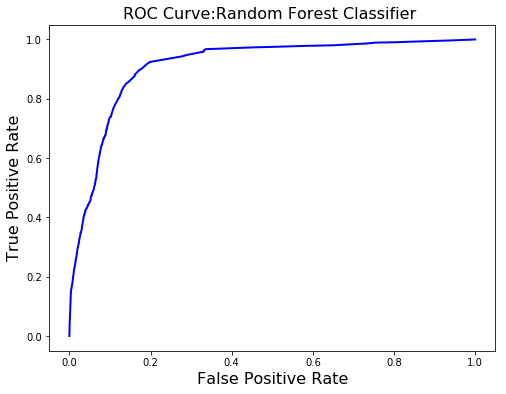

<Figure size 432x288 with 0 Axes>

In [115]:
ROC_curve('Random Forest Classifier ',y_train,rmf_cif_score)

In [192]:
tp=7310
tn=155
fp=43
fn=730

In [193]:
spec=tn/(fp+tn)
spec

0.7828282828282829

In [194]:
spec=tn/(fp+tn)
spec

0.7828282828282829

In [195]:
prec=tp/(tp+fp)
prec

0.9941520467836257

# KNN classifier

In [107]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [108]:
y_pred=clf.predict(x_test)

In [109]:
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 0 ... 0 0 0]


In [110]:
print("y")
print(y_test.values)

y
[0 0 0 ... 1 0 0]


In [111]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:90.786599
Recall score:51.638418
ROC score:73.568427
[[7022  331]
 [ 428  457]]


In [112]:
probas=clf.predict_proba(x_test)
probas

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

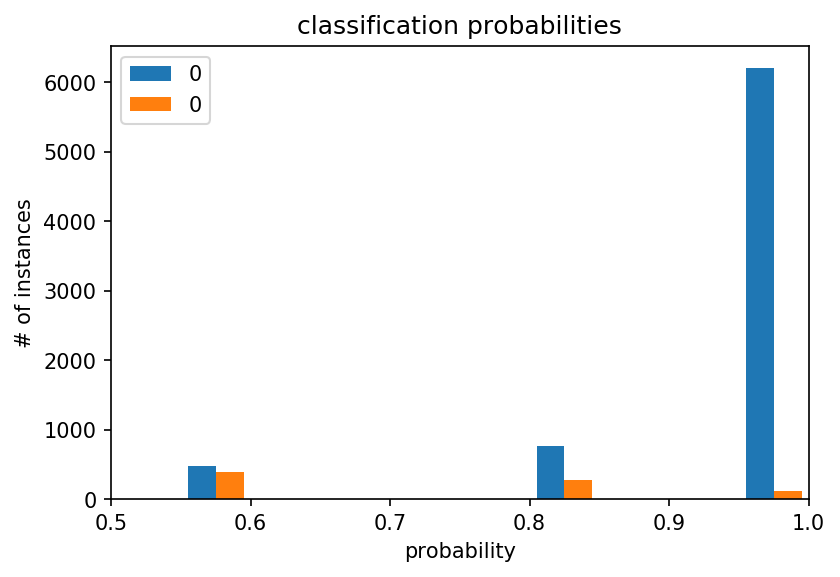

In [113]:
plt.figure(dpi=150)
plt.hist(probas,bins=20)
plt.title("classification probabilities")
plt.xlabel('probability')
plt.ylabel('# of instances')
plt.xlim([0.5,1.0])
plt.legend(y_test)
plt.show()

In [114]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)

In [115]:
clf_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
clf_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')
clf_scores=clf_proba[:,1] #get the score of the positive class
clf_acc

array([0.89229789, 0.89448288, 0.89246039])

AUC Score(kNN):0.790791


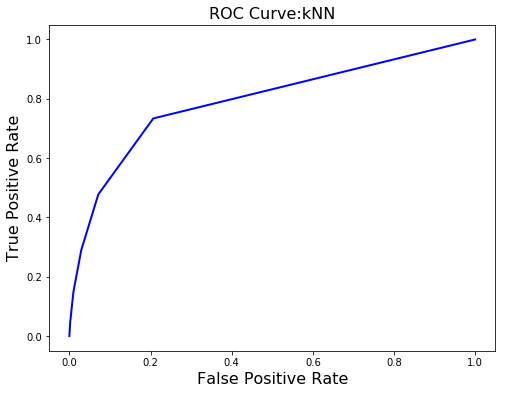

In [116]:
ROC_curve('kNN',y_train,clf_scores)

In [196]:
tp1=7022
tn1=457
fp1=331
fn1=428

In [197]:
sensk=tp1/(tp1+fn1)
sensk

0.9425503355704697

In [198]:
speck=tn1/(fp1+tn1)
speck

0.5799492385786802

In [199]:
prek=tp1/(tp1+fp1)
prek

0.954984360125119

# Logistic Regression Model

In [121]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')
lr_scores=lr_proba[:,1]
lr_acc

array([0.90604516, 0.90832119, 0.90967037])

In [123]:
y_pred=lr.predict(x_test)
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 0 ... 0 0 0]


In [124]:
print("y")
print(y_test.values)

y
[0 0 0 ... 1 0 0]


In [125]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:91.041515
Recall score:39.661017
ROC score:68.443320
[[7149  204]
 [ 534  351]]


In [200]:
tp2=7149
tn2=351
fp2=204
fn2=534

In [201]:
sensl=tp2/(tp2+fn2)
sensl

0.9304959000390473

In [202]:
specl=tn2/(fp2+tn2)
specl

0.6324324324324324

In [203]:
precl=tp2/(tp2+fp2)
precl

0.9722562219502244

AUC Score(Logestic Regression):0.927877


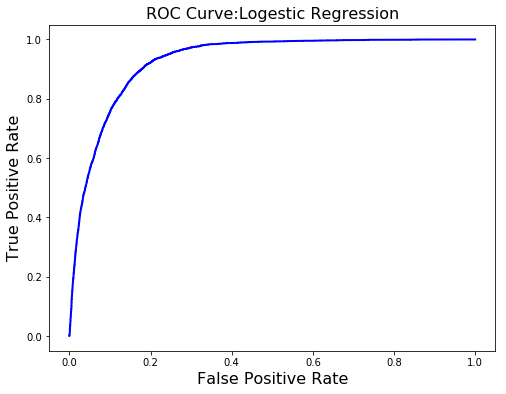

In [204]:
ROC_curve('Logestic Regression',y_train,lr_scores)

# Decision Tree Classifier

In [131]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [132]:
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=1)

In [133]:
dtc_clf_acc

array([0.88902039, 0.88929352, 0.88754325])

In [134]:
dtc_proba = cross_val_predict(dtc_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [135]:
dtc_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [136]:
# predit on test data
y_pred=dtc_clf.predict(x_test)

In [137]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [138]:
print("y")
print(y_test.values)

y
[0 0 0 ... 1 0 0]


In [139]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [140]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


Accuracy score:89.038602


In [141]:
print("Recall score :%f"%(recall_score(y_test,y_pred)*100))

Recall score :53.672316


In [142]:
print("ROC score :%f\n"%(roc_auc_score(y_test,y_pred)*100))

ROC score :73.483785



In [143]:
print(confusion_matrix(y_test,y_pred))

[[6860  493]
 [ 410  475]]


In [144]:
from sklearn import cross_validation,neighbors
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [145]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
40478,67,8,2,3,0,1,0,0,2,0,350,1,6,2,2,-1.7,94.027,-38.3,0.899,4991.6
13994,42,2,2,0,0,0,0,0,1,4,249,2,999,0,0,1.4,93.918,-42.7,4.963,5228.1
4583,39,3,0,1,0,1,0,1,0,3,919,2,999,0,0,1.1,93.994,-36.4,4.856,5191.0
5579,49,2,0,3,0,0,0,1,0,1,232,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
20065,37,0,0,0,0,0,0,0,2,1,86,1,999,0,0,1.4,93.444,-36.1,4.965,5228.1
6667,40,3,0,5,0,0,0,1,0,2,260,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
20043,36,4,0,0,0,0,0,0,2,1,99,1,999,0,0,1.4,93.444,-36.1,4.965,5228.1
39951,53,4,2,0,0,0,0,0,3,1,348,6,999,2,1,-1.7,94.055,-39.8,0.754,4991.6
17455,40,7,0,0,0,1,0,0,1,1,143,9,999,0,0,1.4,93.918,-42.7,4.962,5228.1
33047,35,6,0,1,0,0,0,0,0,1,508,3,999,2,1,-1.8,92.893,-46.2,1.299,5099.1


In [146]:
y_train

40478    1
13994    0
4583     0
5579     0
20065    0
6667     0
20043    0
39951    0
17455    0
33047    0
39173    0
40673    1
28376    0
3441     0
36318    0
23563    0
17055    1
25762    0
10353    1
14406    0
1255     0
39428    0
17134    0
8114     0
21824    0
35341    0
259      0
11883    0
27099    1
31401    0
        ..
16679    0
28864    0
39866    1
18628    0
31134    0
24729    0
5255     0
21581    0
20766    0
18239    0
12615    0
19442    0
36438    0
16754    0
34950    0
34642    0
26585    0
4455     0
23407    0
8040     0
22508    0
18897    0
34054    0
33531    0
9594     0
21583    0
37419    1
1258     0
23537    0
295      0
Name: y, Length: 37069, dtype: int64

In [147]:
x_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
34192,29,3,1,1,0,0,0,0,0,2,240,3,999,1,1,-1.8,92.893,-46.2,1.281,5099.1
30021,52,1,0,4,0,0,0,0,5,2,315,1,999,0,0,-1.8,93.075,-47.1,1.405,5099.1
6904,59,0,0,0,0,1,1,1,0,0,155,1,999,0,0,1.1,93.994,-36.4,4.860,5191.0
23076,50,1,0,3,0,0,1,0,2,3,14,8,999,0,0,1.4,93.444,-36.1,4.965,5228.1
33122,38,1,0,1,0,0,0,0,0,3,151,2,999,1,1,-1.8,92.893,-46.2,1.291,5099.1
37429,28,0,1,0,0,1,0,0,2,2,202,1,999,0,0,-2.9,92.201,-31.4,0.879,5076.2
35489,30,0,0,2,0,0,1,0,0,1,97,1,999,1,1,-1.8,92.893,-46.2,1.244,5099.1
27135,40,4,0,0,0,0,0,0,4,4,161,1,999,0,0,-0.1,93.200,-42.0,4.021,5195.8
13216,36,0,0,0,0,0,1,0,1,2,160,2,999,0,0,1.4,93.918,-42.7,4.962,5228.1
9937,36,0,0,3,0,1,0,1,3,2,211,17,999,0,0,1.4,94.465,-41.8,4.959,5228.1


In [148]:
y_test

34192    0
30021    1
6904     0
23076    0
33122    0
37429    0
35489    0
27135    0
13216    0
9937     0
14232    0
5869     0
25061    0
4891     0
24951    0
6791     0
6        0
3358     0
491      0
8271     0
12000    0
22027    0
23209    0
30894    0
5341     0
13020    0
27823    1
12378    0
9707     0
30210    1
        ..
22362    0
2973     0
17038    0
33602    0
23688    0
17016    0
31811    0
39063    1
38598    0
38311    0
22453    0
1111     0
27364    0
20787    0
19729    0
33754    0
23402    0
23333    0
29345    1
1203     0
33255    0
8855     0
40220    1
26291    0
16641    0
32121    0
16718    0
27357    0
32199    0
6410     0
Name: y, Length: 4119, dtype: int64

In [149]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.48148148, 0.8       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.3       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.3       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.5       , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.2       , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.5       , 0.        , ..., 0.        , 0.08932215,
        0.        ]])

# Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_cif=rmf.fit(x_train,y_train)

In [163]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)

In [164]:
from sklearn.model_selection import cross_val_score,cross_val_predict
rmf_cif_acc=cross_val_score(rmf_cif,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
rmf_proba=cross_val_predict(rmf_cif,x_train_std,y_train,cv=3,method='predict_proba')
rmf_cif_score=rmf_proba[:,1]
rmf_cif_acc

array([0.90159424, 0.89786339, 0.9021528 ])

In [165]:
y_pred=rmf_cif.predict(x_test)
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 0 ... 0 0 0]


In [166]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:90.944404
Recall score:18.706697
ROC score:59.068487
[[3665   21]
 [ 352   81]]


In [155]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title,y_train,scores,label=None):
    #calculate the ROC score
    fpr,tpr,thresholds=roc_curve(y_train,scores)
    print('AUC Score({}):{:2f}'.format(title,roc_auc_score(y_train,scores)))
    #plot the roc curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,linewidth=2,label=label,color='b')
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)
    plt.title('ROC Curve:{}'.format(title),fontsize=16)
    plt.show()

AUC Score(Random Forest Classifier ):0.910141


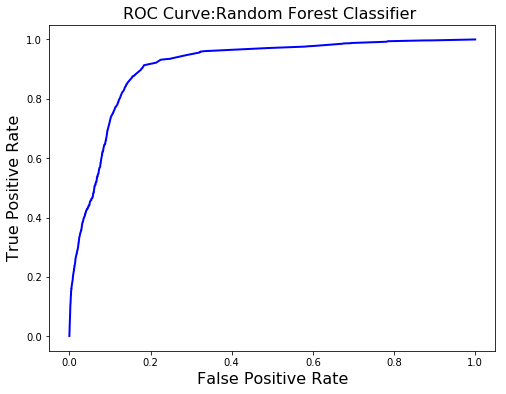

In [156]:
ROC_curve('Random Forest Classifier ',y_train,rmf_cif_score)

In [205]:
tp=3665
tn=81
fp=21
fn=352

In [206]:
sens=tp/(tp+fn)
sens

0.9123724172267862

In [207]:
spec=tn/(fp+tn)
spec

0.7941176470588235

In [208]:
pre=tp/(tp+fp)
pre

0.9943027672273467

# KNN classifier

In [168]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [169]:
y_pred=clf.predict(x_test)

In [170]:
print("\n Predicted test values:")
print(y_pred)


 Predicted test values:
[0 0 0 ... 0 0 0]


In [171]:
print("y")
print(y_test.values)

y
[0 1 0 ... 0 0 0]


In [172]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:90.968682
Recall score:54.041570
ROC score:74.674068
[[3513  173]
 [ 199  234]]


In [173]:
probas=clf.predict_proba(x_test)
probas

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ]])

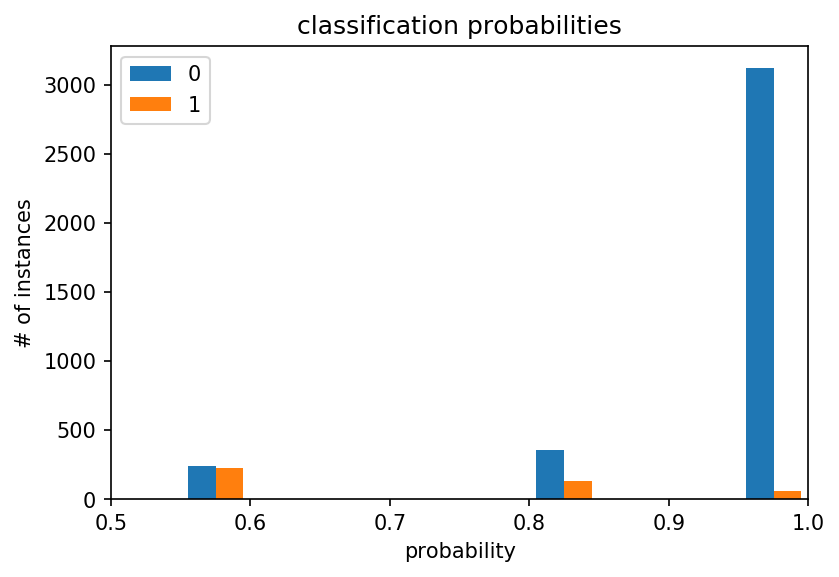

In [174]:
plt.figure(dpi=150)
plt.hist(probas,bins=20)
plt.title("classification probabilities")
plt.xlabel('probability')
plt.ylabel('# of instances')
plt.xlim([0.5,1.0])
plt.legend(y_test)
plt.show()

In [175]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)

In [176]:
clf_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
clf_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')
clf_scores=clf_proba[:,1] #get the score of the positive class
clf_acc

array([0.89495832, 0.89171253, 0.89624474])

AUC Score(kNN):0.775102


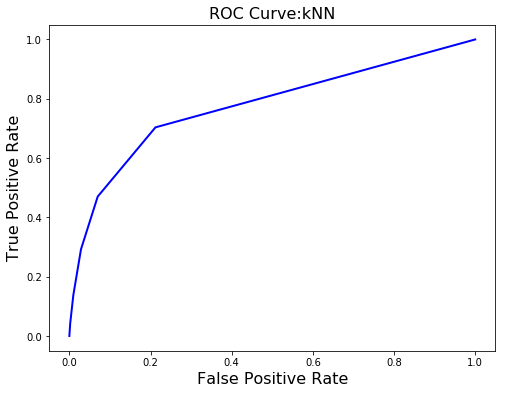

In [177]:
ROC_curve('kNN',y_train,clf_scores)

In [209]:
tp1=3513
tn1=234
fp1=173
fn1=199

In [210]:
sensk=tp1/(tp1+fn1)
sensk

0.9463900862068966

In [211]:
speck=tn1/(fp1+tn1)
speck

0.5749385749385749

In [212]:
prek=tp1/(tp1+fp1)
prek

0.9530656538252849

# logistic regression model

In [182]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [183]:
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')
lr_scores=lr_proba[:,1]
lr_acc

array([0.91033422, 0.90425704, 0.90951764])

In [184]:
y_pred=lr.predict(x_test)
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 0 ... 0 0 0]


In [185]:
print("y")
print(y_test.values)

y
[0 1 0 ... 0 0 0]


In [186]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:91.454236
Recall score:42.725173
ROC score:69.951843
[[3582  104]
 [ 248  185]]


In [213]:
tp2=3582
tn2=185
fp2=104
fn2=248

In [214]:
sensl=tp2/(tp2+fn2)
sensl

0.935248041775457

In [215]:
specl=tn2/(fp2+tn2)
specl

0.6401384083044983

In [216]:
precl=tp2/(tp2+fp2)
precl

0.9717851329354313

AUC Score(Logestic Regression):0.927877


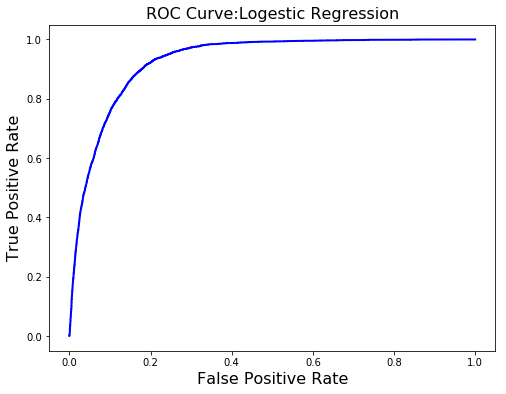

In [217]:
ROC_curve('Logestic Regression',y_train,lr_scores)

# Decision Tree Classification

In [218]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [219]:
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=1)

In [220]:
dtc_clf_acc

array([0.89155944, 0.88879896, 0.88968922])

In [221]:
dtc_proba = cross_val_predict(dtc_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [222]:
dtc_proba

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [223]:
# predit on test data
y_pred=dtc_clf.predict(x_test)

In [224]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [225]:
print("y")
print(y_test.values)

y
[0 1 0 ... 0 0 0]


In [226]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [227]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


Accuracy score:88.856519


In [228]:
print("Recall score :%f"%(recall_score(y_test,y_pred)*100))

Recall score :52.193995


In [229]:
print("ROC score :%f\n"%(roc_auc_score(y_test,y_pred)*100))

ROC score :72.678658



In [230]:
print(confusion_matrix(y_test,y_pred))

[[3434  252]
 [ 207  226]]


In [116]:
from sklearn import cross_validation,neighbors
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [117]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3988,45,1,0,2,0,0,1,1,0,1,943,2,999,0,0,1.1,93.994,-36.4,4.858,5191.0
30973,49,6,0,1,0,0,1,0,0,3,214,3,999,1,1,-1.8,92.893,-46.2,1.344,5099.1
18172,40,2,0,3,0,1,0,0,1,2,65,5,999,0,0,1.4,93.918,-42.7,4.963,5228.1
40222,21,10,1,2,0,1,0,1,1,0,5,1,999,0,0,-1.7,94.215,-40.3,0.884,4991.6
40792,28,1,1,0,0,1,0,0,7,0,744,1,999,0,0,-1.1,94.199,-37.5,0.878,4963.6
743,44,2,1,3,0,0,1,1,0,3,139,2,999,0,0,1.1,93.994,-36.4,4.857,5191.0
23548,31,0,0,0,0,0,0,0,2,0,80,1,999,0,0,1.4,93.444,-36.1,4.962,5228.1
16603,30,4,0,0,0,0,0,0,1,2,957,3,999,0,0,1.4,93.918,-42.7,4.963,5228.1
24981,51,6,0,2,0,1,0,0,4,3,125,1,999,1,1,-0.1,93.200,-42.0,4.153,5195.8
21428,39,0,1,0,0,0,0,0,2,3,104,1,999,0,0,1.4,93.444,-36.1,4.963,5228.1


In [118]:
y_train

3988     1
30973    0
18172    0
40222    0
40792    1
743      0
23548    0
16603    1
24981    0
21428    0
39015    0
23320    0
26775    1
3363     0
15907    0
16814    0
19020    0
26978    0
20697    0
19554    0
29702    0
28667    0
25944    0
11447    0
34836    0
27639    0
510      0
22075    0
1801     0
11288    0
        ..
13550    0
2842     0
22496    0
3307     0
40569    0
27176    0
5351     0
6441     0
13413    0
17248    0
20887    0
39005    0
5496     0
32804    0
28072    0
34859    0
6626     0
22800    0
36750    0
17012    0
25983    0
3279     0
14565    0
17618    0
4347     0
33626    0
10489    0
24289    0
33867    0
32997    0
Name: y, Length: 30891, dtype: int64

In [119]:
x_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
2738,43,3,0,1,0,1,0,1,0,2,124,1,999,0,0,1.1,93.994,-36.4,4.859,5191.0
27505,50,2,0,0,0,1,0,0,4,4,302,2,999,1,1,-0.1,93.200,-42.0,4.021,5195.8
36481,53,2,2,0,0,1,0,0,3,2,705,1,999,1,1,-2.9,92.963,-40.8,1.260,5076.2
13092,32,0,0,2,0,1,0,1,1,3,320,3,999,0,0,1.4,93.918,-42.7,4.962,5228.1
4449,36,7,0,5,0,0,1,1,0,3,324,1,999,0,0,1.1,93.994,-36.4,4.856,5191.0
35288,25,3,1,1,0,1,0,0,0,4,21,2,999,0,0,-1.8,92.893,-46.2,1.250,5099.1
1810,34,1,0,2,0,0,0,1,0,4,1054,2,999,0,0,1.1,93.994,-36.4,4.855,5191.0
10192,37,2,1,1,0,1,0,1,3,0,227,2,999,0,0,1.4,94.465,-41.8,4.958,5228.1
33549,32,4,1,3,0,0,0,0,0,3,68,10,999,1,1,-1.8,92.893,-46.2,1.291,5099.1
26491,44,7,0,0,0,1,0,1,4,0,39,1,999,0,0,-0.1,93.200,-42.0,4.076,5195.8


In [120]:
y_test

2738     0
27505    0
36481    1
13092    0
4449     0
35288    0
1810     0
10192    0
33549    0
26491    0
12374    0
7405     0
20062    0
4873     0
40234    1
31636    0
18001    0
1062     0
26958    0
28868    0
33457    0
711      0
10335    0
4763     0
26482    0
3327     0
27086    0
31891    0
32050    0
6864     0
        ..
30262    0
37995    1
30854    0
6384     0
40740    1
8602     0
30370    0
25078    0
8798     0
19968    0
9048     0
36996    0
2811     0
5021     0
1956     0
2770     0
31734    0
21518    0
15914    0
29453    0
8409     0
22145    0
26813    0
26759    0
9088     0
7112     0
504      1
38330    1
38448    1
2891     0
Name: y, Length: 10297, dtype: int64

In [121]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.48148148, 0.8       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.3       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.3       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.5       , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.2       , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.5       , 0.        , ..., 0.        , 0.08932215,
        0.        ]])

# Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_cif=rmf.fit(x_train,y_train)

In [123]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)

In [128]:
from sklearn.model_selection import cross_val_score,cross_val_predict
rmf_cif_acc=cross_val_score(rmf_cif,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
rmf_proba=cross_val_predict(rmf_cif,x_train_std,y_train,cv=3,method='predict_proba')
rmf_cif_score=rmf_proba[:,1]
rmf_cif_acc

array([0.89812567, 0.90152472, 0.90249587])

In [125]:
y_pred=rmf_cif.predict(x_test)
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 0 ... 1 0 0]


In [126]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:90.356414
Recall score:16.063548
ROC score:57.802616
[[9122   42]
 [ 951  182]]


In [127]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title,y_train,scores,label=None):
    #calculate the ROC score
    fpr,tpr,thresholds=roc_curve(y_train,scores)
    print('AUC Score({}):{:2f}'.format(title,roc_auc_score(y_train,scores)))
    #plot the roc curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,linewidth=2,label=label,color='b')
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)
    plt.title('ROC Curve:{}'.format(title),fontsize=16)
    plt.show()

AUC Score(Random Forest Classifier ):0.906343


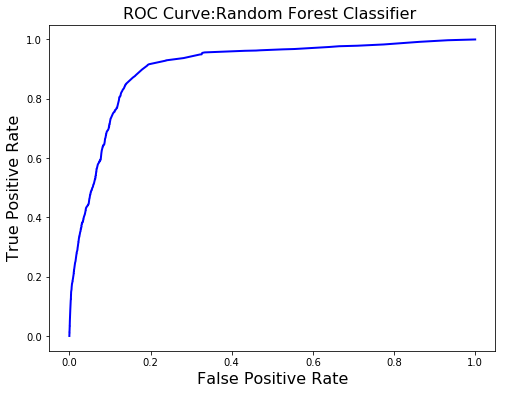

In [130]:
ROC_curve('Random Forest Classifier ',y_train,rmf_cif_score)

In [174]:
tp=9122
tn=182
fp=42
fn=951

In [175]:
sens=tp/(tp+fn)
sens

0.9055891988484066

In [176]:
spec=tn/(fp+tn)
spec

0.8125

In [177]:
pre=tp/(tp+fp)
pre

0.9954168485377565

# KNN classifier

In [135]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [136]:
y_pred=clf.predict(x_test)

In [137]:
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 1 ... 1 1 0]


In [138]:
print("y")
print(y_test.values)

y
[0 0 1 ... 1 1 0]


In [139]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:90.919685
Recall score:48.631951
ROC score:72.389960
[[8811  353]
 [ 582  551]]


In [140]:
probas=clf.predict_proba(x_test)
probas

array([[1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       ...,
       [0.2, 0.8],
       [0.4, 0.6],
       [1. , 0. ]])

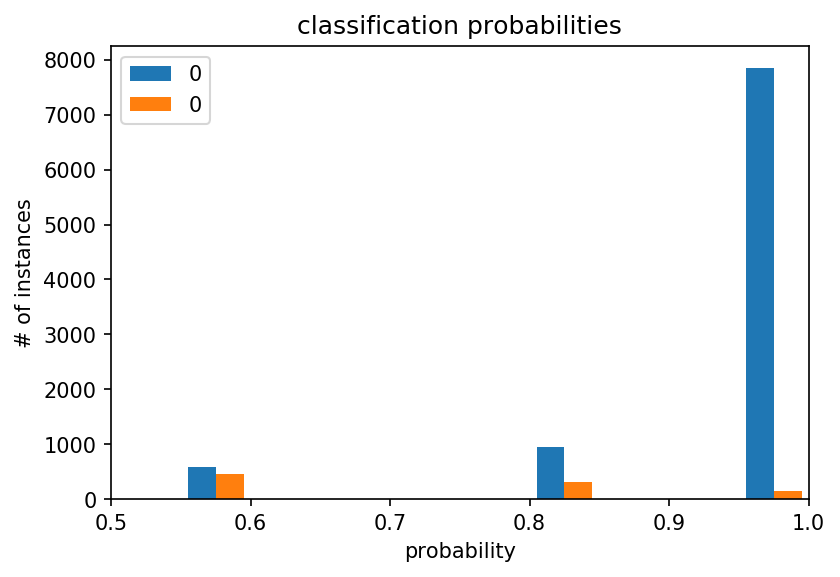

In [141]:
plt.figure(dpi=150)
plt.hist(probas,bins=20)
plt.title("classification probabilities")
plt.xlabel('probability')
plt.ylabel('# of instances')
plt.xlim([0.5,1.0])
plt.legend(y_test)
plt.show()

In [142]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)

In [143]:
clf_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
clf_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')
clf_scores=clf_proba[:,1] #get the score of the positive class
clf_acc

array([0.89093911, 0.89540643, 0.89035641])

AUC Score(kNN):0.770379


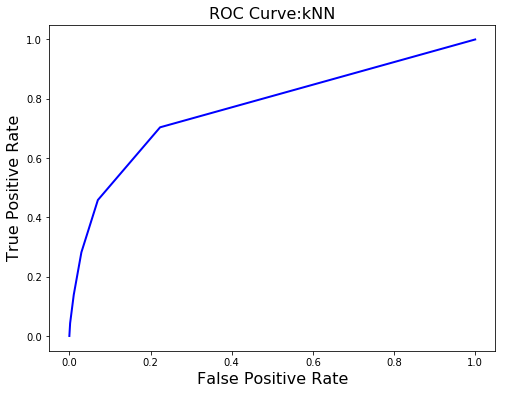

In [144]:
ROC_curve('kNN',y_train,clf_scores)

In [178]:
tp1=8811
tn1=551
fp1=353
fn1=582

In [179]:
sensk=tp1/(tp1+fn1)
sensk

0.9380389651868413

In [180]:
speck=tn1/(fp1+tn1)
speck

0.6095132743362832

In [181]:
prek=tp1/(tp1+fp1)
prek

0.9614797031863815

# Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [150]:
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')
lr_scores=lr_proba[:,1]
lr_acc

array([0.90803147, 0.90958532, 0.90647761])

In [151]:
y_pred=lr.predict(x_test)
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 1 ... 1 0 0]


In [152]:
print("y")
print(y_test.values)

y
[0 0 1 ... 1 1 0]


In [153]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:91.104205
Recall score:38.834951
ROC score:68.200758
[[8941  223]
 [ 693  440]]


In [182]:
tp2=8941
tn2=440
fp2=223
fn2=693

In [183]:
sensl=tp2/(tp2+fn2)
sensl

0.9280672617811916

In [184]:
specl=tn2/(fp2+tn2)
specl

0.6636500754147813

In [185]:
precl=tp2/(tp2+fp2)
precl

0.9756656481885639

AUC Score(Logistic Regression):0.927435


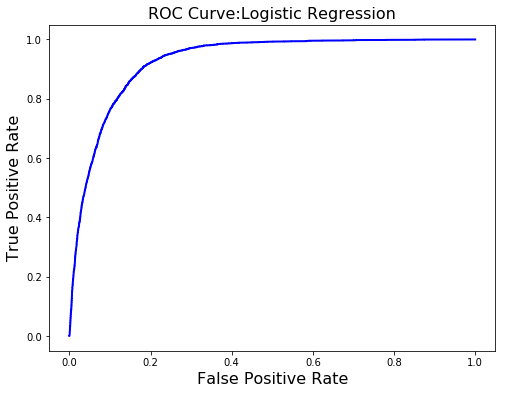

In [186]:
ROC_curve('Logistic Regression',y_train,lr_scores)

# Decision Tree Classifier

In [159]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [160]:
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=1)

In [161]:
dtc_clf_acc

array([0.88996795, 0.88802564, 0.88812275])

In [162]:
dtc_proba = cross_val_predict(dtc_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [163]:
dtc_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [164]:
# predit on test data
y_pred=dtc_clf.predict(x_test)

In [165]:
y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [166]:
print("y")
print(y_test.values)

y
[0 0 1 ... 1 1 0]


In [167]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [168]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


Accuracy score:88.821987


In [169]:
print("Recall score :%f"%(recall_score(y_test,y_pred)*100))

Recall score :49.514563


In [170]:
print("ROC score :%f\n"%(roc_auc_score(y_test,y_pred)*100))

ROC score :71.598181



In [171]:
print(confusion_matrix(y_test,y_pred))

[[8585  579]
 [ 572  561]]


In [187]:
tp=8585
tn=561
fp=579
fn=572

In [188]:
sens=tp/(tp+fn)
sens

0.9375341268974555

In [189]:
spec=tn/(fp+tn)
spec

0.4921052631578947

In [190]:
pre=tp/(tp+fp)
pre

0.9368179834133566